# **FINAL PROJECT CHECKPOINT 2**
## **DUE: *April 01, 2025 @ 11:59 PM***
## **24-HR LATE DUE DATE WITH A 15% PENALTY: *April 02, 2025 @ 11:59 PM***

### (5 points) Data preprocessing:
(a) import
(b) parse (e.g., convert strings to ints)
(c) organize (e.g., set up a database or a pandas DataFrame)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv('NYPD_Shooting_Incident_Data__Historic_.csv')
df.head()

# Convert date columns to datetime format
df['OCCUR_DATE'] = pd.to_datetime(df['OCCUR_DATE'], errors='coerce')

df

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,231974218,2021-08-09,01:06:00,BRONX,NaN,40,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.006343e+06,234270.000000,40.809673,-73.920193,POINT (-73.92019278899994 40.80967347200004)
1,177934247,2018-04-07,19:48:00,BROOKLYN,NaN,79,0.0,NaN,NaN,True,...,M,WHITE HISPANIC,25-44,M,BLACK,1.000083e+06,189064.671875,40.685610,-73.942913,POINT (-73.94291302299996 40.685609672000055)
2,255028563,2022-12-02,22:57:00,BRONX,OUTSIDE,47,0.0,STREET,GROCERY/BODEGA,False,...,(null),(null),25-44,M,BLACK,1.020691e+06,257125.000000,40.872349,-73.868233,POINT (-73.868233 40.872349)
3,25384540,2006-11-19,01:50:00,BROOKLYN,NaN,66,0.0,NaN,PVT HOUSE,True,...,U,UNKNOWN,18-24,M,BLACK,9.851073e+05,173349.796875,40.642490,-73.996912,POINT (-73.99691224999998 40.642489932000046)
4,72616285,2010-05-09,01:58:00,BRONX,NaN,46,0.0,NaN,MULTI DWELL - APT BUILD,True,...,M,BLACK,<18,F,BLACK,1.009854e+06,247502.562500,40.845984,-73.907461,POINT (-73.90746098599993 40.84598358900007)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28557,82565818,2012-01-10,16:52:00,MANHATTAN,NaN,23,2.0,NaN,MULTI DWELL - PUBLIC HOUS,False,...,M,BLACK HISPANIC,25-44,M,WHITE HISPANIC,1.000102e+06,229680.187500,40.797089,-73.942750,POINT (-73.94275038599994 40.79708909900006)
28558,52550581,2008-10-27,19:00:00,BROOKLYN,NaN,83,0.0,NaN,MULTI DWELL - APT BUILD,False,...,M,WHITE HISPANIC,25-44,M,WHITE HISPANIC,1.004686e+06,193261.375000,40.697119,-73.926302,POINT (-73.92630225199997 40.697119222000026)
28559,23354135,2006-07-10,19:47:00,BROOKLYN,NaN,60,0.0,NaN,NaN,False,...,M,BLACK,<18,M,BLACK,9.841473e+05,150277.703125,40.579162,-74.000371,POINT (-74.00037110599999 40.57916181000007)
28560,59753078,2009-03-20,20:02:00,BROOKLYN,NaN,72,0.0,NaN,MULTI DWELL - APT BUILD,False,...,M,WHITE HISPANIC,18-24,M,WHITE HISPANIC,9.809204e+05,174343.578125,40.645217,-74.012000,POINT (-74.01199971799997 40.645217064000065)


### (20 points) Basic data exploration and summary statistics
- You must present three conclusions using at least three different statistical methods including hypothesis testing.
    - For example: What are the main characteristics of your dataset? How many features and entries are there? Is a feature over-represented? Are features correlated? Are there outliers? Identify the attributes that will affect your choice of primary analysis technique. Etcetera.

- For each method, you must have at least one gorgeous plot.

Chi-squared statistic: 114248.0
p-value: 0.0


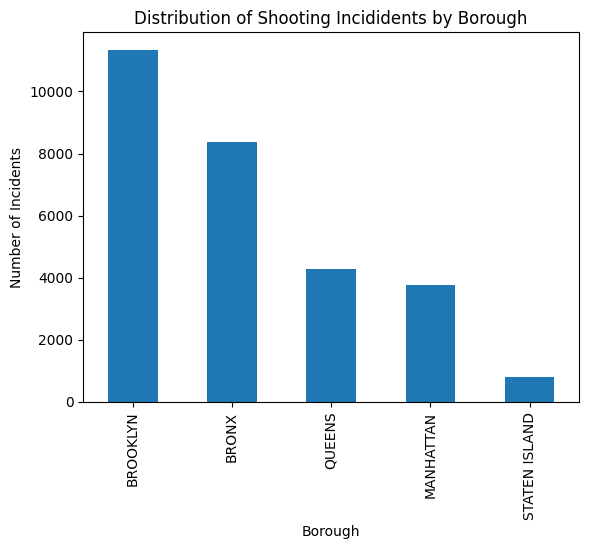

/var/folders/t4/z8h1pcsj677c0jbq2fp_dych0000gn/T/ipykernel_59232/4130812575.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['OCCUR_TIME'] = pd.to_datetime(df['OCCUR_TIME'])




Summary statistics for the 'OCCUR_TIME' column (disregard the date): 
 count                            28562
mean     2025-04-01 12:44:16.713115392
min                2025-04-01 00:00:00
25%                2025-04-01 03:30:00
50%                2025-04-01 15:15:00
75%                2025-04-01 20:45:00
max                2025-04-01 23:59:00
Name: OCCUR_TIME, dtype: object


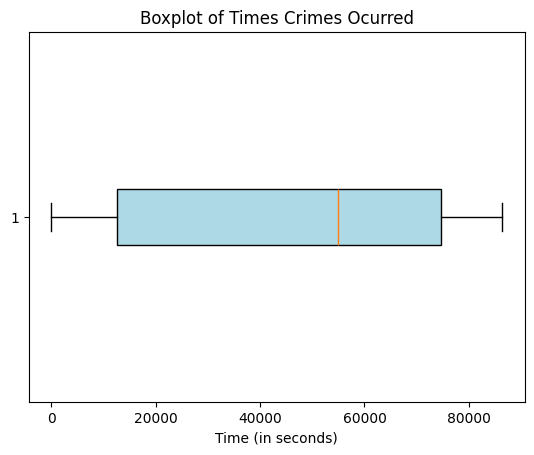

In [ ]:
# conclusion 1: Shooting incidents are not evenly distributed across boroughs
# statistical method: chi-squared test with a p-value of 0.05
# H0: there is no association between the borough and the occurence of shooting incidents
# H1: There is an association, the distribution of shooting incidents is not the same across all boroughs

observed = pd.crosstab(df['BORO'], df['INCIDENT_KEY']).values
chi2, p, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-squared statistic: {chi2}")
print(f"p-value: {p}")

df['BORO'].value_counts().plot(kind='bar', title='Distribution of Shooting Incididents by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Incidents')
plt.show()


# conclusion 2: The distribution of times the crimes ocurred is skewed slightly to the left but doesn't have 
# any outliers since the times tend to be either early in the morning or late at night.
# statistical method: summary statistics

df['OCCUR_TIME'] = pd.to_datetime(df['OCCUR_TIME'])
summary = df['OCCUR_TIME'].describe()
print("\n\nSummary statistics for the 'OCCUR_TIME' column (disregard the date): \n", summary)

df['timeDelta'] = df['OCCUR_TIME'] - df['OCCUR_TIME'].min()

plt.boxplot(df['timeDelta'].dt.total_seconds(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot of Times Crimes Ocurred')
plt.xlabel('Time (in seconds)')
plt.show()


Method 3: Summarizing by most likely locations for shootings based on longitude and latitude, using a kernel density estimation from the seaborn library

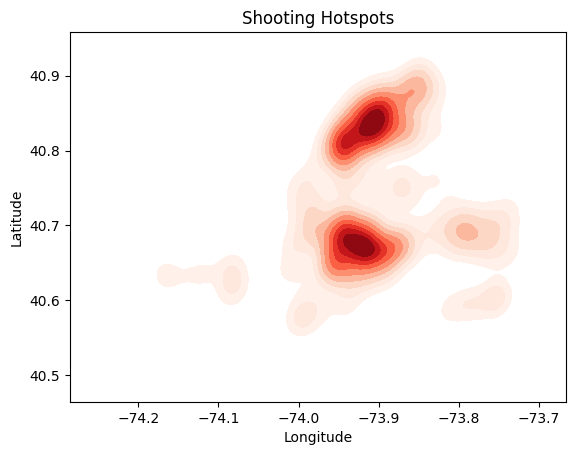

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(x=df["Longitude"], y=df["Latitude"], cmap="Reds", fill=True)
plt.title("Shooting Hotspots")
plt.show()

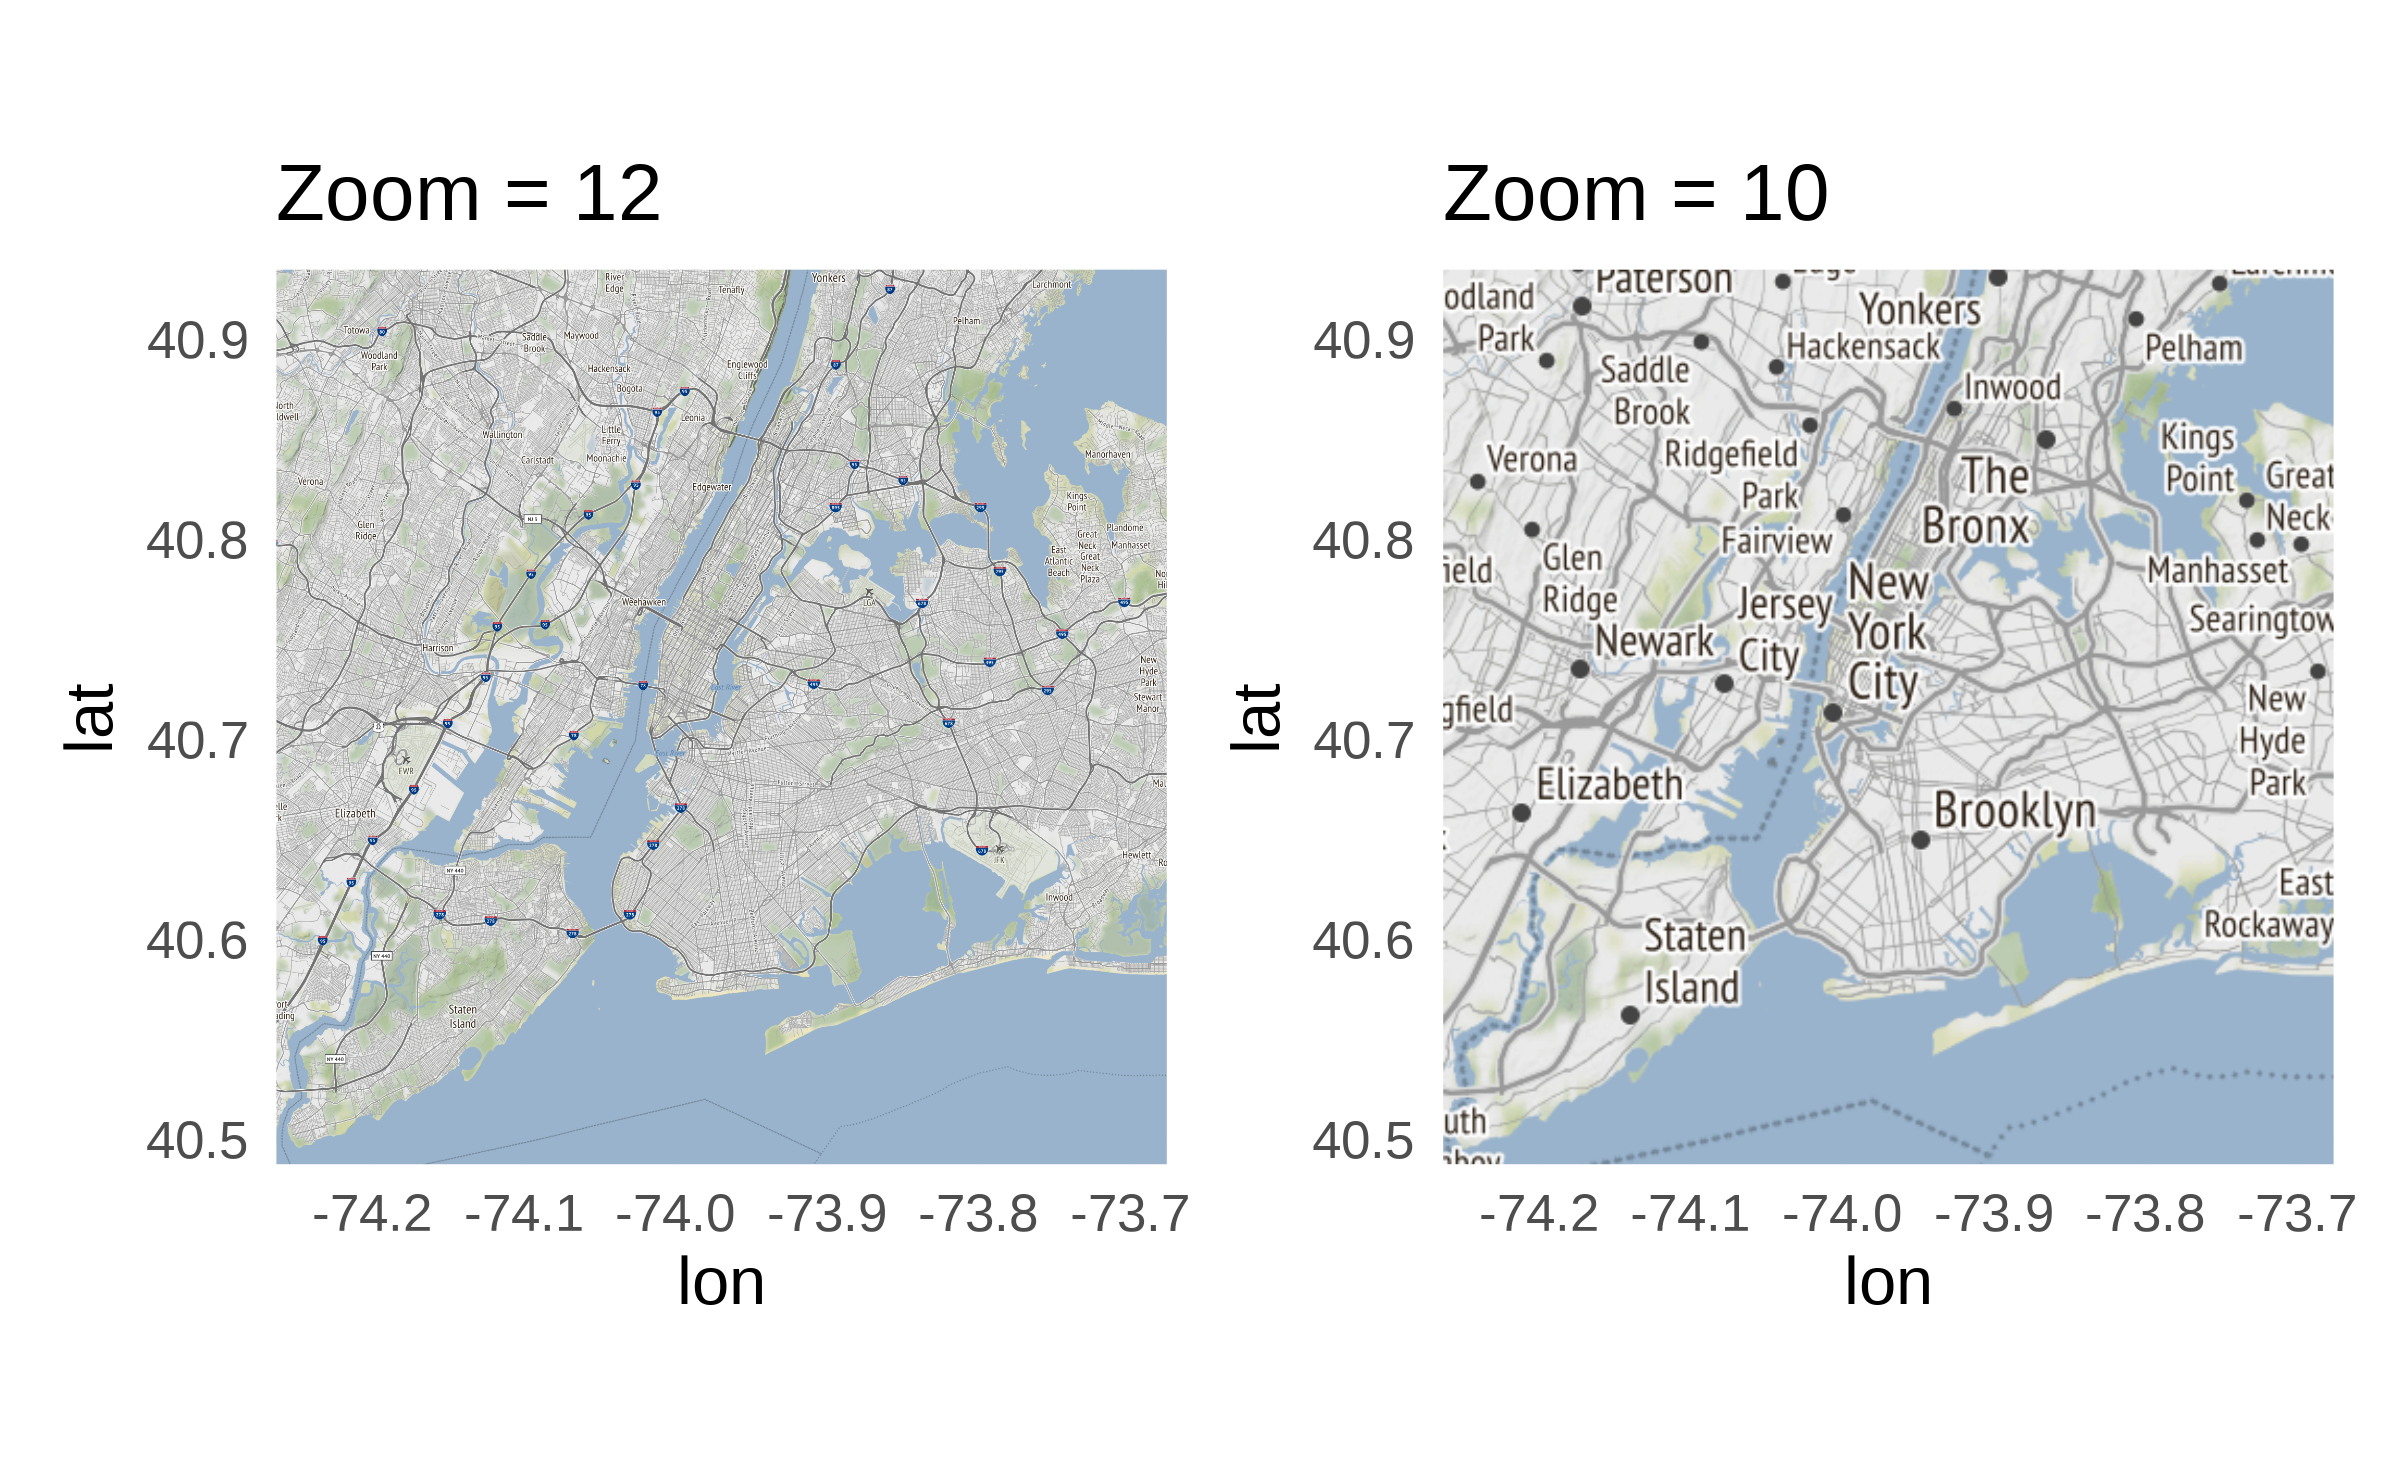

src: https://info5940.infosci.cornell.edu/slides/visualize-spatial-i/index_files/figure-html/bb-nyc-stamen-zoom-1.png

Conclusions: Based on this hotspot map, most of the shootings seem centered around Brooklyn, The Bronx, and upper Manhattan. This provides a very specific visualisation of exactly where shootings tended to occur. The image below the map helps visualize exactly where the hotspot map corresponds to. It may be useful to overlay the hotspot map onto the map of NYC in the future.